<a href="https://colab.research.google.com/github/shekhar-banerjee96/CNN_MNIST/blob/main/skb_sign_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd

In [111]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d datamunge/sign-language-mnist

mkdir: cannot create directory ‘/root/.kaggle’: File exists
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
import zipfile
with zipfile.ZipFile('/content/sign-language-mnist.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [113]:
train = pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')

In [114]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [115]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [116]:
test.shape , train.shape

((7172, 785), (27455, 785))

In [117]:
train_labels = train['label']
test_labels = test['label']

test = test.iloc[:,1:]
train = train.iloc[:,1:]

In [118]:
real_train_labels = train_labels.apply(lambda x : chr(x+65))
real_test_labels = test_labels.apply(lambda x : chr(x+65))

In [119]:
real_train_labels[9:12]

9     D
10    S
11    K
Name: label, dtype: object

In [120]:
train_data = np.array(train.values).reshape(train.shape[0],28,28)
test_data = np.array(test.values).reshape(test.shape[0],28,28)

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

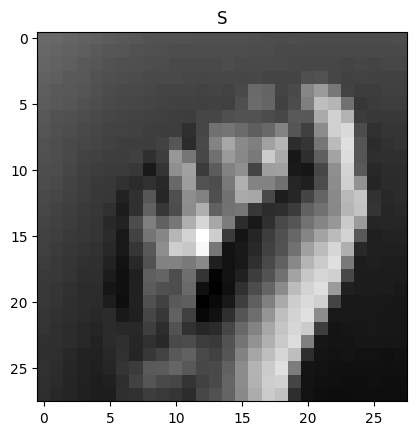

In [122]:
plt.figure()
plt.imshow(train_data[102],cmap = plt.cm.binary)
plt.title(real_train_labels[102])
plt.show()

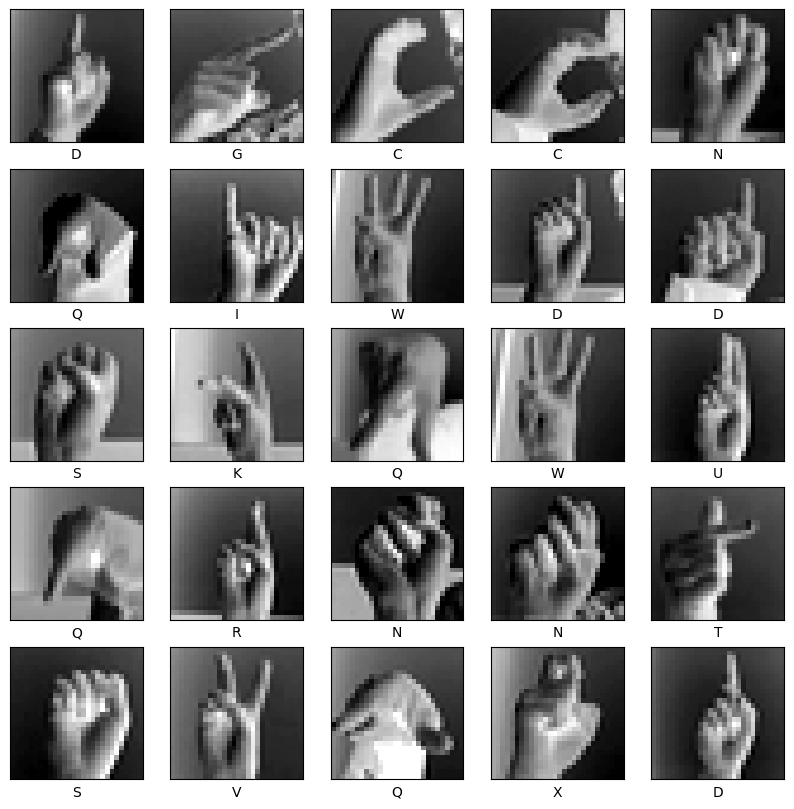

In [123]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i],cmap = plt.cm.binary)
    plt.xlabel(real_train_labels[i])
plt.show()

In [124]:
train_labels[101]

19

In [125]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [126]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [127]:
import tensorflow as tf
from tensorflow import keras

from keras import Sequential

from keras.layers import Dense , Flatten , Conv2D, MaxPooling2D , BatchNormalization , Dropout

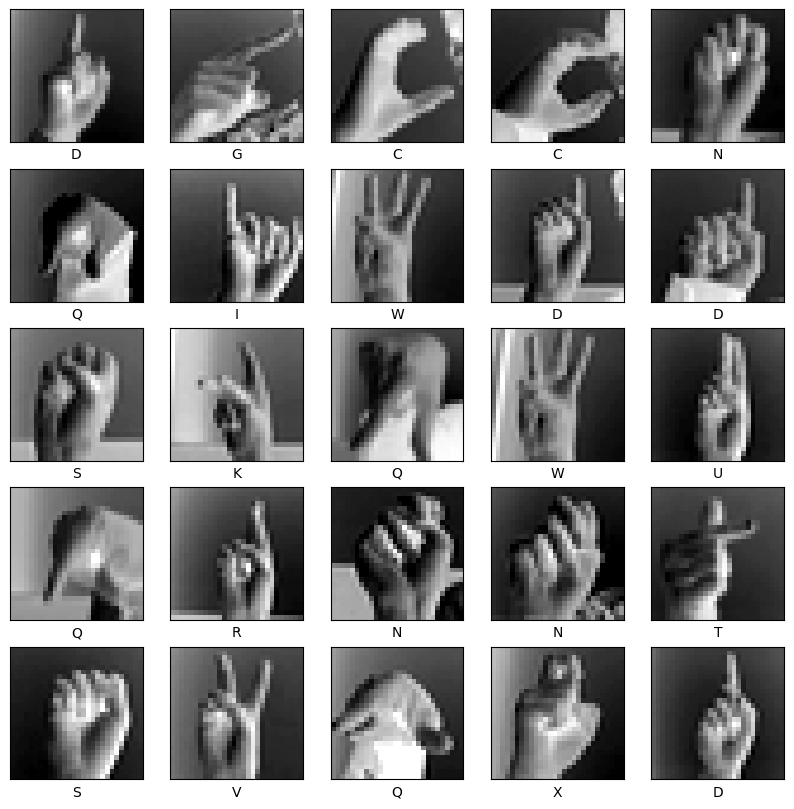

In [128]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i],cmap = plt.cm.binary)
    plt.xlabel(real_train_labels[i])
plt.show()

In [129]:
model = Sequential()

model.add(Conv2D(16,kernel_size = (3,3) , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides=2, padding='same'))

model.add(Conv2D(32, kernel_size = (3,3), padding = "same" , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) ,  strides = 2 , padding = 'same'))

model.add(Conv2D(64, kernel_size = (3,3), padding = "same" , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) ,  strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25,activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_7 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                      

In [130]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [131]:
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


858/858 [==============================] - 7s 6ms/step - loss: 1.2581 - accuracy: 0.5983 - val_loss: 0.3586 - val_accuracy: 0.8759
Epoch 2/10
858/858 [==============================] - 6s 7ms/step - loss: 0.2597 - accuracy: 0.9134 - val_loss: 0.2153 - val_accuracy: 0.9352
Epoch 3/10
858/858 [==============================] - 5s 6ms/step - loss: 0.1441 - accuracy: 0.9511 - val_loss: 0.2129 - val_accuracy: 0.9373
Epoch 4/10
858/858 [==============================] - 6s 7ms/step - loss: 0.1021 - accuracy: 0.9653 - val_loss: 0.3424 - val_accuracy: 0.9194
Epoch 5/10
858/858 [==============================] - 5s 6ms/step - loss: 0.0967 - accuracy: 0.9692 - val_loss: 0.2989 - val_accuracy: 0.9155
Epoch 6/10
858/858 [==============================] - 5s 6ms/step - loss: 0.0734 - accuracy: 0.9758 - val_loss: 0.4054 - val_accuracy: 0.8825
Epoch 7/10
858/858 [==============================] - 6s 7ms/step - loss: 0.0670 - accuracy: 0.9784 - val_loss: 0.2572 - val_accuracy: 0.9370
Epoch 8/10
858/85

In [132]:
model.save('sign_mnist_simple.keras')

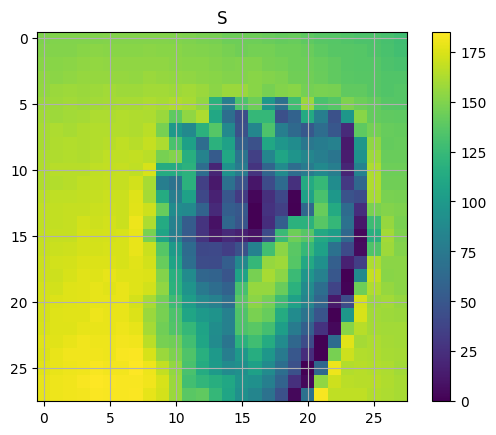

In [133]:
plt.figure()
plt.imshow(train_data[20])
plt.colorbar()
plt.grid(True)
plt.title(real_train_labels[20])
plt.show()

In [134]:
train_data[1].shape

(28, 28)

In [135]:
chr(np.argmax(model.predict(train_data[20].reshape(1,28,28))) + 65)

1/1 [==============================] - 0s 104ms/step


'S'

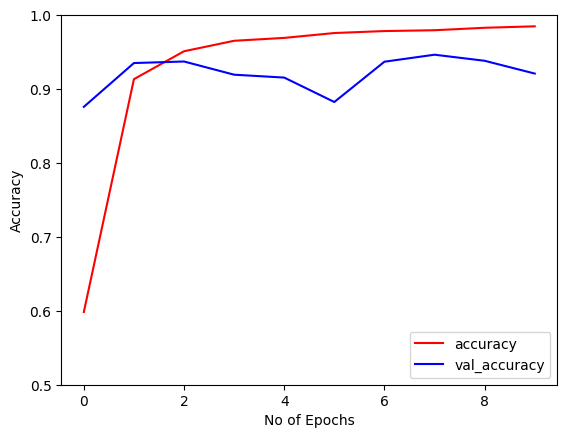

In [136]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label ='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')
plt.show()

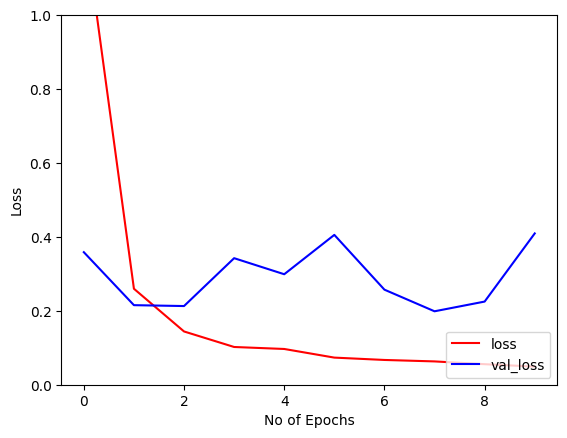

In [137]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label ='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

# Transfer Learning

In [138]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

train_3 =np.dstack([train_data] * 3)
test_3 =np.dstack([test_data]*3)
train_3.shape , test_3.shape

((27455, 28, 84), (7172, 28, 84))

In [139]:
# Reshape images as per the tensor format required by tensorflow

train_3 = train_3.reshape(-1, 28,28,3)
test_3 = test_3.reshape (-1,28,28,3)
train_3.shape , test_3.shape

((27455, 28, 28, 3), (7172, 28, 28, 3))

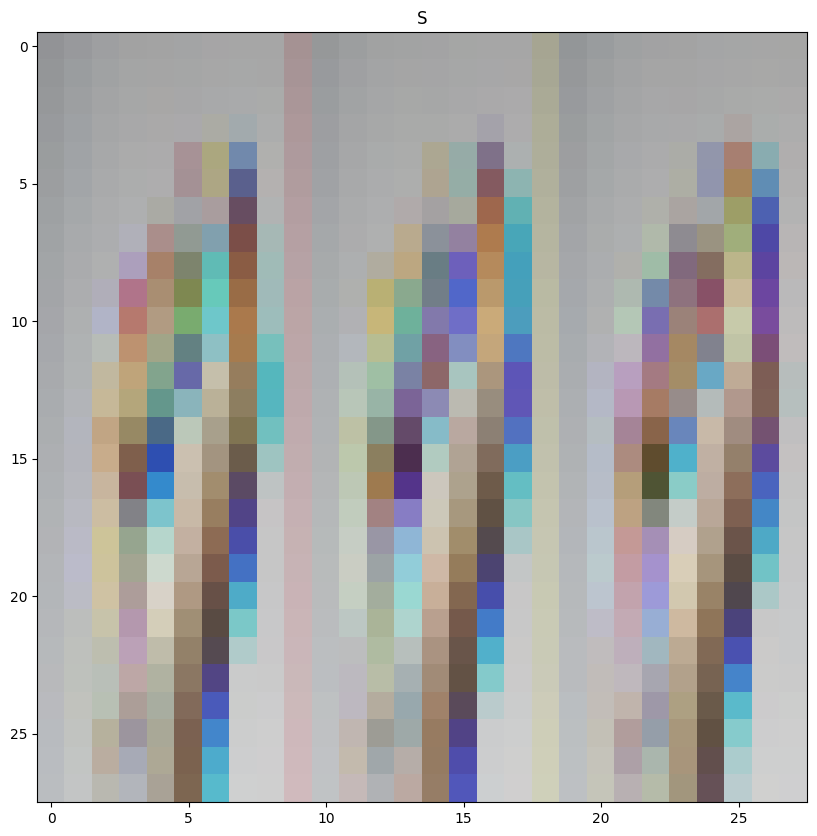

In [140]:
plt.figure(figsize= (30,10))
plt.imshow(train_3[102],cmap = plt.cm.binary)
plt.title(real_train_labels[102])
plt.show()

In [141]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

train_3 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_3])
test_3 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_3])
#train_x = preprocess_input(x)
train_3.shape, test_3.shape

((27455, 48, 48, 3), (7172, 48, 48, 3))

In [142]:
# Import VGG-16

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Flatten
from keras.applications.vgg16 import VGG16

conv_base = VGG16(
    weights = 'imagenet',
    include_top = False ,
    input_shape = (48,48,3)
)


In [143]:
model_vgg = Sequential()
model_vgg.add(conv_base)
model_vgg.add(Flatten())
model_vgg.add(Dense(256,activation='relu'))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(64,activation='relu'))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(32,activation='relu'))
model_vgg.add(Dense(25,activation='softmax'))

conv_base.trainable = False

model_vgg.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
              ,metrics=['accuracy'])

history = model_vgg.fit(
        train_3,train_labels,
        epochs=15,
        validation_data=(test_3,test_labels))

Epoch 1/15
858/858 [==============================] - 19s 20ms/step - loss: 4.6892 - accuracy: 0.0958 - val_loss: 2.9159 - val_accuracy: 0.1680
Epoch 2/15
858/858 [==============================] - 17s 19ms/step - loss: 2.7439 - accuracy: 0.2022 - val_loss: 2.3302 - val_accuracy: 0.3320
Epoch 3/15
858/858 [==============================] - 16s 19ms/step - loss: 2.1281 - accuracy: 0.3553 - val_loss: 1.7288 - val_accuracy: 0.4883
Epoch 4/15
858/858 [==============================] - 14s 16ms/step - loss: 1.5306 - accuracy: 0.5245 - val_loss: 1.2713 - val_accuracy: 0.6110
Epoch 5/15
858/858 [==============================] - 16s 19ms/step - loss: 1.0715 - accuracy: 0.6596 - val_loss: 1.0110 - val_accuracy: 0.7005
Epoch 6/15
858/858 [==============================] - 14s 16ms/step - loss: 0.7814 - accuracy: 0.7484 - val_loss: 0.8270 - val_accuracy: 0.7653
Epoch 7/15
858/858 [==============================] - 16s 19ms/step - loss: 0.5831 - accuracy: 0.8114 - val_loss: 0.7287 - val_accuracy:

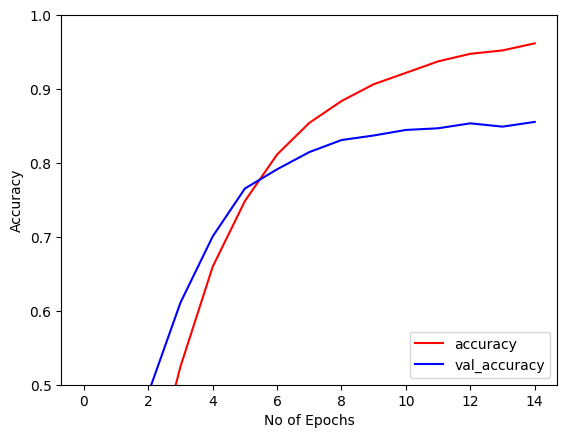

In [144]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label ='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')
plt.show()

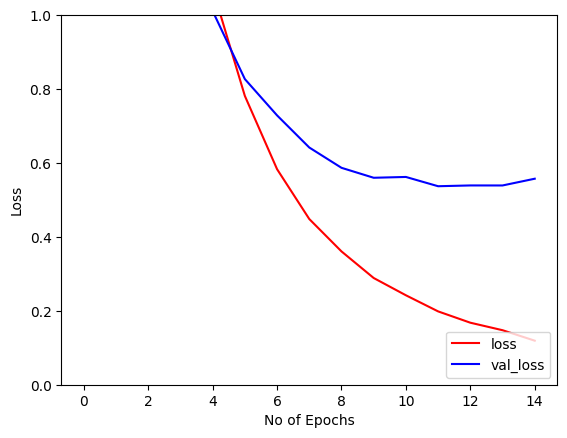

In [145]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label ='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

In [150]:
model_vgg.save('sign_mnist_VGG.keras')

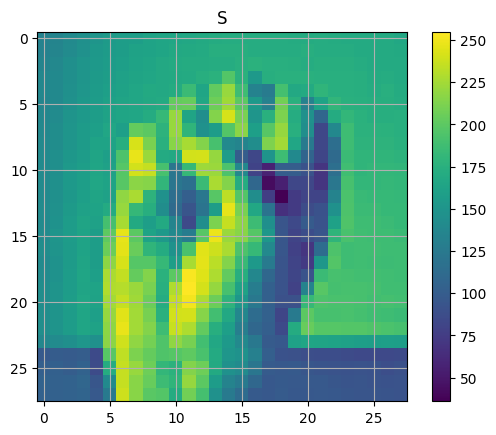

In [147]:
plt.figure()
plt.imshow(train_data[10])
plt.colorbar()
plt.title(real_train_labels[10])
plt.grid(True)
plt.show()

In [148]:
chr(65+np.argmax(model_vgg.predict(train_3[10].reshape(1,48,48,3))))

1/1 [==============================] - 0s 149ms/step


'S'